In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



ModuleNotFoundError: No module named 'pandas'

In [ ]:

df = pd.read_csv("C:/Users/aboky/Documents/ESGI/orchestration ML/projet/data/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
## Choix des features 

In [3]:
# Sélection des features
features = [
    'person_age', 'person_income', 'person_emp_exp',
    'person_home_ownership', 'person_education', 'loan_amnt',
    'loan_intent', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score',
    'previous_loan_defaults_on_file'
]

In [4]:
x = df[features]
y = df['loan_status']

In [5]:
x

,person_age,person_income,person_emp_exp,person_home_ownership,person_education,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,71948.0,0,RENT,Master,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,12282.0,0,OWN,High School,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,12438.0,3,MORTGAGE,High School,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,79753.0,0,RENT,Bachelor,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,66135.0,1,RENT,Master,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,RENT,Associate,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,65800.0,17,RENT,Associate,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,56942.0,7,RENT,Associate,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,33164.0,4,RENT,Bachelor,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [6]:
## Encodage des variables catégorielles 

for col in x.select_dtypes(include='object').columns:
    x[col] = LabelEncoder().fit_transform(x[col])

C:\Users\aboky\AppData\Local\Temp\ipykernel_19412\2792571954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = LabelEncoder().fit_transform(x[col])
C:\Users\aboky\AppData\Local\Temp\ipykernel_19412\2792571954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = LabelEncoder().fit_transform(x[col])
C:\Users\aboky\AppData\Local\Temp\ipykernel_19412\2792571954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [13]:
## courbe d'apprentissage

In [ ]:
#### OPTIMISATION DES HYPERPARAMETRES

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [16]:

# Modèle de base
rf = RandomForestClassifier(random_state=42)

# Dictionnaire des hyperparamètres
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized Search
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", search.best_params_)
print("Score AUC :", search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Meilleurs hyperparamètres : {'bootstrap': False, 'max_depth': 27, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 289}
Score AUC : 0.9727837394256333


Nouvel entrainement avec les meilleurs hyperparamètres détectés

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Meilleurs hyperparamètres trouvés
best_params = {
    'bootstrap': False,
    'max_depth': 27,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 8,
    'n_estimators': 289,
    'random_state': 42
}

# Entraînement du modèle final
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=27, max_features='log2',
                       min_samples_split=8, n_estimators=289, random_state=42)

In [21]:


y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC (test):", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000

AUC (test): 0.9745927017274144


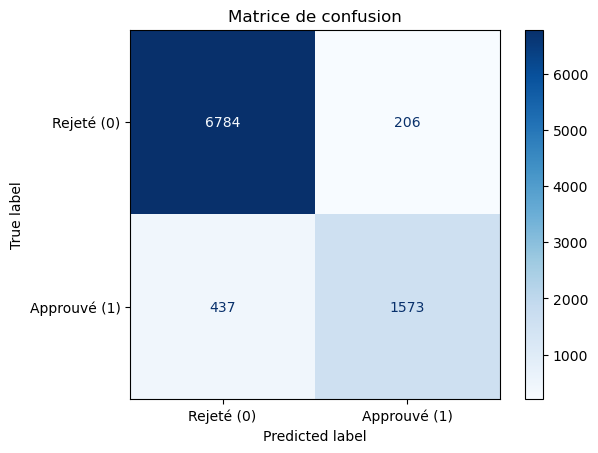

In [25]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejeté (0)', 'Approuvé (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

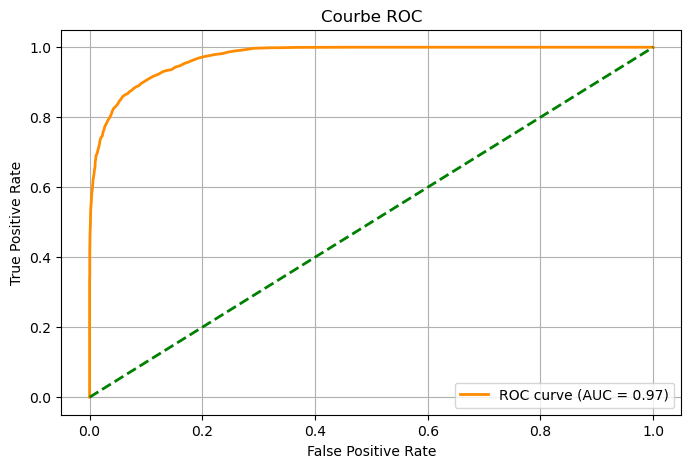

In [26]:
# --- 1. Courbe ROC ---
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1"
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

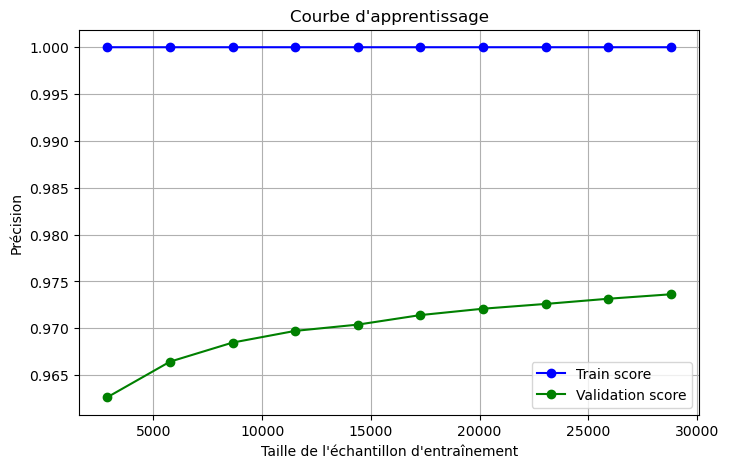

In [35]:
# --- 2. Courbe d'apprentissage ---
train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Précision')
plt.legend(loc='best')
plt.grid()
plt.show()

Validation et interprétabilité


In [32]:
## CROSS VALIDATION

In [29]:
scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Scores AUC CV :", scores)
print("AUC moyenne CV :", scores.mean())

Scores AUC CV : [0.97224826 0.97667207 0.97084187 0.97530009 0.97309488]
AUC moyenne CV : 0.9736314337048408


In [ ]:
## Importance des features

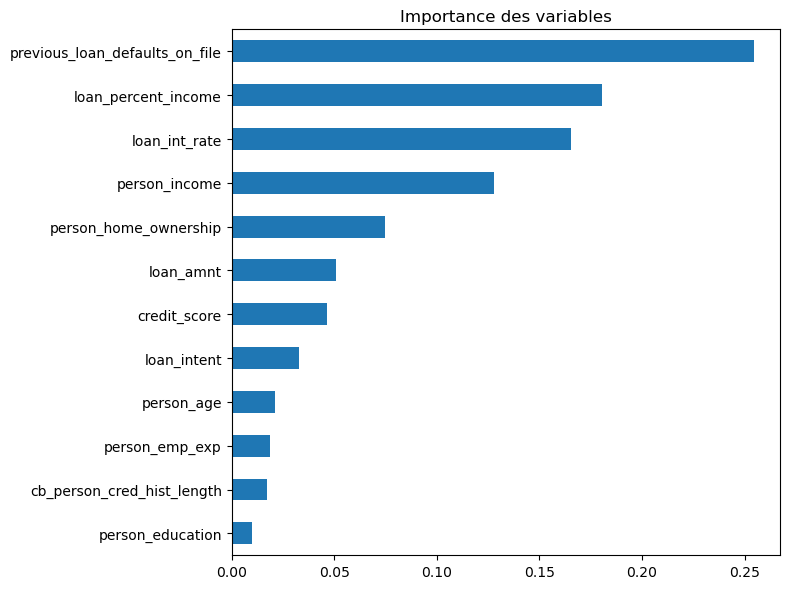

In [36]:


importances = final_model.feature_importances_
features = X_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Affichage
feat_importance.plot(kind='barh', figsize=(8, 6), title="Importance des variables")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#### Valeurs de shapley

In [ ]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Résumé global
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Détail sur un individu
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])
